# Steps to build any Machine Learning model
## 1. Import required libraries
## 2. Load data
## 3. Prepare data (split into train data and test data). Inspect Data.
## 4. Train your model
## 5. Predict on test data 
## 6. Evaluate the model
## 7. Create more models

In [1]:
#install Seaborn package. Comment after running once.
#!pip install seaborn

## 1. Import required modules

In [2]:
# 1. Import required libraries
import pandas as pd   #read, DataFrames
import numpy as np    #array and math operations

from sklearn.model_selection import train_test_split   #splitting data

from sklearn.linear_model import LinearRegression         #linear regression
from sklearn.metrics.regression import mean_squared_error #error metrics

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline                          

## 2. Load and prepare the data 

In [3]:
# 2. Load data

wine_train = pd.read_csv('wine.csv')        # wine data for training is loaded
wine_test = pd.read_csv('wine_test.csv')    # wine data for testing is loaded

In [4]:
# Check the head of the data (first few rows)
wine_train.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [5]:
wine_test.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


## 3. Inspect and explore data

In [6]:
# Prepare the data 

# look out for missing values and values that shouldn't be present there

In [7]:
# Summary Statistics
wine_train.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,27.000000,26.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1966.814815,7.069296,573.222222,14.046915,148.592593,15.481481,50041.561519
std,8.246384,0.637289,237.306088,8.899148,76.491960,9.645128,3737.473414
min,1952.000000,6.204900,-418.000000,-17.650000,38.000000,-7.000000,43183.569000
25%,1960.500000,6.548275,519.000000,15.975000,88.000000,9.500000,46856.000000
50%,1967.000000,7.121100,600.000000,16.416700,130.000000,16.000000,50650.406000
75%,1973.500000,7.468250,705.500000,17.008350,187.000000,22.500000,53511.207500
max,1980.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [8]:
wine_train.isnull().sum()

Year           0
Price          1
WinterRain     0
AGST           0
HarvestRain    0
Age            0
FrancePop      0
dtype: int64

In [9]:
wine_train = wine_train[wine_train['WinterRain']>0]

In [10]:
wine_train = wine_train.dropna()

In [11]:
wine_train

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


## Few plots

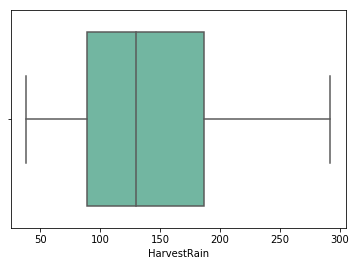

In [12]:
#boxplot to check the distribution of data
sns.boxplot(wine_train.HarvestRain ,orient="h", palette="Set2")

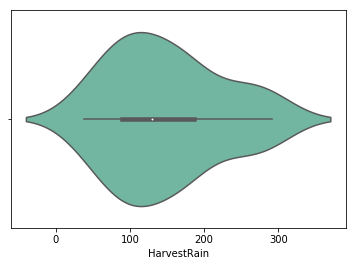

In [13]:
#Violin plot to check the distribution of data
sns.violinplot(wine_train.HarvestRain,orient="h", palette="Set2")

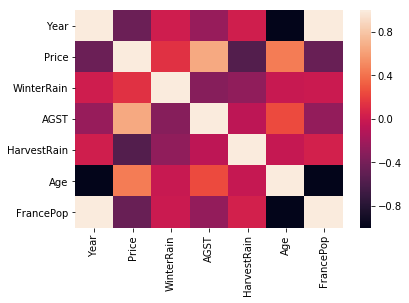

In [14]:
#correlation plot
cor=wine_train.corr()
sns.heatmap(cor)

## 4. Train your model

In [15]:
# Train DataFrames 
X_train = wine_train[['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop']]
y_train = wine_train[['Price']]

In [16]:
# Test DataFrames 
X_test = wine_test[['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age', 'FrancePop']]
y_test=wine_test[['Price']]
X_test.head()

,Year,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,717,16.1667,122,4,54835.832
1,1980,578,16.0000,74,3,55110.236


In [17]:
# 4. Train your model
# initialize the model
model1= LinearRegression()

# fit the model
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 5. Predict on test data 

In [18]:
# Predict on test data 

predictions = model1.predict(X_test)
print(predictions)

[[6.82046158]
 [6.75114385]]


In [ ]:
'''
   Original values     Predicted values    Difference
        6.9541            6.82046158         -0.1336
        6.4979            6.75114385          0.25324
             
'''

##  6. Evaluate the model

In [20]:
#error metric mean squared error
mse1 = mean_squared_error(y_test,predictions)
print(mse1)

0.040995836781388614


In [21]:
#root mean squared error
import numpy as np
rmse1 = np.sqrt(mse1)
print(rmse1)

0.2024742867165819


## 7. Create 1 more model

In [22]:
# Let us drop the France Population column and check if we see any improvement

X_train = wine_train[['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age']]
X_test = wine_test[['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age']]
model2 = LinearRegression()
model2.fit(X_train,y_train)
mse2 = mean_squared_error(y_test,model2.predict(X_test))
print(mse2)
rmse2 = np.sqrt(mse2)
print(rmse2)

0.034293549453125155
0.18518517611603028


In [23]:
predictions = model2.predict(X_test)
print(predictions)

[[6.7734375]
 [6.6875   ]]


In [ ]:
'''
   Original values     Predicted values       New Difference            old Difference
        6.9541            6.7734375             -0.180662                  -0.1336
        6.4979            6.6875                 0.1896                     0.25324
             
'''